First we are going to install some dependencies:
* Tensorflow and tensorflow-gpu is what we are going to use to build the deep learning model
* Opencv-python is going to be use to preprocess the data
* Matplotlib will be use to visualize these images
* Pandas for reading the csv
* Tqdm for aesthetic

In [6]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib pandas scikit-learn tqdm

Defaulting to user installation because normal site-packages is not writeable


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
You should consider upgrading via the 'c:\program files\python38\python.exe -m pip install --upgrade pip' command.


We are going to import two key dependencies:
* Tensorflow as said earlier for the model
* Os is going to be use to navigate to data obtaining always good results regardless of your system

In [5]:
import os
import tensorflow as tf

Because when we are doing big models with large datasets It will expand and use all the gpu we have available, we need to prevent an Out Of Memory Error using these lines below:
* What we do is first is list all the gpus we have.
* The next loop is limiting the memory growth of each gpu and keeping it to the minimum or what It really needs.

In [6]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

We need to import some more dependencies:
   * Pandas for reading the csv
   * tqmd for aesthetic progress load of the images
   * All the keras imports are for preprocessing and the building of the model
   * Numpy for converting our data int arrays if needed
   * Sklearn for extracting statistic from our models 
   * Matplotlib for plotting images

In [7]:
import pandas as pd
from tqdm import tqdm

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import to_categorical
from tensorflow.keras.utils import load_img , img_to_array
import numpy as np
from sklearn.metrics import confusion_matrix , classification_report
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

No we must define the path for our data to be readen. We are going to read the train data. To see if it was correct we are going to show the head of our data.

In [8]:
data_dir='data'
dtrain=pd.read_csv(os.path.join(data_dir,'train.csv'))
dtrain.head()

,label,latitude,longitude,year,example_path
0,0,-2.051853,111.826093,2001,train_test_data/train/1297.png
1,2,-1.989349,105.309496,2013,train_test_data/train/1199.png
2,0,1.223256,100.702217,2014,train_test_data/train/1348.png
3,0,-2.342948,103.890226,2008,train_test_data/train/2214.png
4,0,-0.126555,101.758175,2011,train_test_data/train/2220.png


Now we are going obtain the images refers in the train csv we just have read. For that first we will iterate and for each row we will:
* Obtain the path of the image store in the column "example_path"
* Convert that image into an array
* We will use the magical formula of optimitation dividing the array by 255 
* Finally we will added it to our collection named "train_image"

Finally we will set our X value into this train_image array

In [13]:
train_image = []
for i in tqdm(range(dtrain.shape[0])):
    img = load_img(os.path.join(data_dir,dtrain['example_path'][i]))
    img = img_to_array(img)
    img = img/255
    train_image.append(img)
X = np.array(train_image)


100%|██████████████████████████████████████████████████████████████████████████████| 1714/1714 [00:30<00:00, 55.70it/s]


As we can see our array has 1714 images each with a size of (332,332,3)

In [14]:
X.shape

(1714, 332, 332, 3)

In order to see if all we did is correct lets show a image of the array using matplotlib

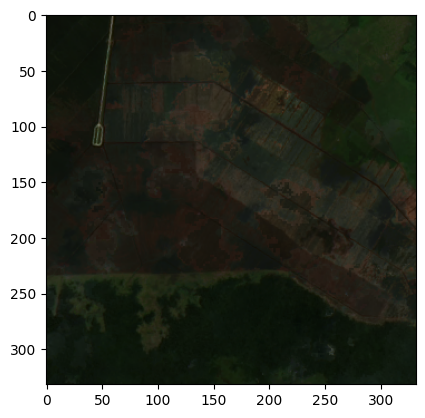

In [11]:
plt.imshow(X[8])

Now that we have loaded the images we are going to drop the values we dont need, we are going to focus only on the label.

Because what it gives us is an array of arrays we need to resize that into an array of ints. If we print it you can see the diference between boths

In [11]:
y = np.array(dtrain.drop(['example_path', 'latitude','longitude','year'],axis=1))
print("Before reshape: ");print(y)
y=y.reshape(-1,)
print("After reshape: ");print(y)

Before reshape: 
[[0]
 [2]
 [0]
 ...
 [1]
 [2]
 [2]]
After reshape: 
[0 2 0 ... 1 2 2]


Now we are going to define the clases just to visualize an example. We have three and their names are below.

In [18]:
classes=['Plantation','Grassland','Smallholder']

As we can see we have 1714 images and we only be focussing on the label column

In [19]:
y.shape

(1714,)

We will define a plot in order to show a sample and verify It is, in fact, correct.

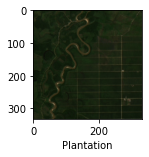

In [21]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])
    
plot_sample(X, y, 2)

First we are building a simple neuronal network. Then we will compile it using a loss of 'sparse_categorical_crossentropy' because we have three labels. The activation is pretty standard both relu and sigmoid.
We are training it with 5 epochs.

In [52]:
ann = Sequential([
        Flatten(input_shape=(332,332,3)),
        Dense(3000, activation='relu'),
        Dense(1000, activation='relu'),
        Dense(3, activation='sigmoid')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X, y, epochs=5)

Epoch 1/5
54/54 [==============================] - 171s 3s/step - loss: 0.9922 - accuracy: 0.4702
Epoch 2/5
54/54 [==============================] - 178s 3s/step - loss: 0.9605 - accuracy: 0.5093
Epoch 3/5
54/54 [==============================] - 154s 3s/step - loss: 0.9543 - accuracy: 0.5181
Epoch 4/5
54/54 [==============================] - 143s 3s/step - loss: 0.9545 - accuracy: 0.5268
Epoch 5/5
54/54 [==============================] - 156s 3s/step - loss: 0.9535 - accuracy: 0.5111


We will predicct with the train data. We are going to get the maximal value of the three of them.
Then we will get a classification report comparing the actual values with the one predicted.

In [54]:
y_pred = ann.predict(X)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y, y_pred_classes))

54/54 [==============================] - 33s 615ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       0.59      0.87      0.70       860
           1       1.00      0.01      0.01       196
           2       0.56      0.38      0.46       658

    accuracy                           0.58      1714
   macro avg       0.72      0.42      0.39      1714
weighted avg       0.63      0.58      0.53      1714



Now we are going to do it with deep learing, using convolutional neural networks. What will this network have?
* Two convolutional layers with a size of 3x3 each, 32 filter on one and 64 filter on the other and both using activation relu
* Two maxPool for each convolutional layers of 2x2
* And then our neural network as we saw before but changing the activation to softmax to get the predicctions normalized

In [56]:
cnn = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(332, 332, 3)),
    MaxPooling2D((2, 2)),
    
    Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])


We will compile it using adam a popular optimizier for this kind of networks, with the same loss as before and metrics

In [57]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

We are training our model with the same data we used earlier (train images) for 10 epochs

In [58]:
cnn.fit(X, y, epochs=10)

Epoch 1/10
54/54 [==============================] - 117s 2s/step - loss: 1.2136 - accuracy: 0.4947
Epoch 2/10
54/54 [==============================] - 107s 2s/step - loss: 0.9024 - accuracy: 0.5473
Epoch 3/10
54/54 [==============================] - 114s 2s/step - loss: 0.8190 - accuracy: 0.6050
Epoch 4/10
54/54 [==============================] - 107s 2s/step - loss: 0.6738 - accuracy: 0.6978
Epoch 5/10
54/54 [==============================] - 120s 2s/step - loss: 0.4584 - accuracy: 0.7981
Epoch 6/10
54/54 [==============================] - 125s 2s/step - loss: 0.2428 - accuracy: 0.9212
Epoch 7/10
54/54 [==============================] - 116s 2s/step - loss: 0.1511 - accuracy: 0.9527
Epoch 8/10
54/54 [==============================] - 110s 2s/step - loss: 0.0896 - accuracy: 0.9790
Epoch 9/10
54/54 [==============================] - 107s 2s/step - loss: 0.0446 - accuracy: 0.9942
Epoch 10/10
54/54 [==============================] - 107s 2s/step - loss: 0.0395 - accuracy: 0.9918


As we did earlier we are going to show the report for the CNN

In [59]:
y_pred_cnn = cnn.predict(X)
y_pred_classes_cnn = [np.argmax(element) for element in y_pred_cnn]

print("Classification Report: \n", classification_report(y, y_pred_classes_cnn))

54/54 [==============================] - 27s 494ms/step
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       860
           1       1.00      1.00      1.00       196
           2       1.00      1.00      1.00       658

    accuracy                           1.00      1714
   macro avg       1.00      1.00      1.00      1714
weighted avg       1.00      1.00      1.00      1714



We are evaluation the performance of our model

In [60]:
cnn.evaluate(X,y)

54/54 [==============================] - 26s 480ms/step - loss: 0.0174 - accuracy: 0.9988


[0.01741879992187023, 0.9988331198692322]

Now we will predict with the train data. If we extract the first 5 predicction we will see it's giving us the normalized value for each type of deforestation

In [61]:
y_pred = cnn.predict(X)
y_pred[:5]

54/54 [==============================] - 26s 478ms/step


array([[9.9713838e-01, 1.6280374e-06, 2.8599757e-03],
       [3.2944420e-17, 0.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 5.7035722e-15, 3.1507708e-09],
       [1.0000000e+00, 2.0195666e-11, 3.0894007e-08],
       [9.9997079e-01, 4.7972936e-22, 2.9202671e-05]], dtype=float32)

Because we only want the one who is more probable, we are getting the max value from the three it's giving us. As we can see below the classes for the first five images of the csv are these

In [62]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[0, 2, 0, 0, 0]

We will do the same load of data for the test as we did with the train data. First reading the csv and then loading the images

In [24]:
dtest_final=pd.read_csv(os.path.join(data_dir,'test.csv'))
dtest_final.head()

,latitude,longitude,year,example_path
0,0.761681,122.755954,2006,train_test_data/test/69.png
1,-8.059785,113.053791,2007,train_test_data/test/469.png
2,-2.006610,111.746316,2002,train_test_data/test/6.png
3,0.901765,114.042495,2016,train_test_data/test/351.png
4,1.911210,100.829633,2008,train_test_data/test/1001.png


In [25]:
test_image_final = []
for i in tqdm(range(dtest_final.shape[0])):
    img = load_img(os.path.join(data_dir,dtest_final['example_path'][i]))
    img = img_to_array(img)
    img = img/255
    test_image_final.append(img)
X_test_final = np.array(test_image_final)


100%|████████████████████████████████████████████████████████████████████████████████| 635/635 [00:16<00:00, 39.27it/s]


In [26]:
X_test_final.shape

(635, 332, 332, 3)

We will predict with the data from the test csv.Then as we did earlier we will also take the maximal value from the probability of the three types of deforestation

In [71]:
y_test_final= cnn.predict(X_test_final)
y_classes_final= [np.argmax(element) for element in y_test_final]

20/20 [==============================] - 8s 423ms/step


0

Taking the predicctions we did earlier we will build an preddiction json file. First we will put the id of each photo with the predicction for it in a dictionary.

In [76]:
target=dict()
for i in range(len(dtest_final)):
    id = dtest_final['example_path'][i].split("/")[2].split('.')[0]
    target[id]=y_classes_final[i]

Then we will use this dictionary as the value for the key "target" in another dictionary. Obtaining this way the format we wanted for the predictions

In [79]:
predictions= dict()
predictions['target']=target
print(predictions)

{'target': {'69': 0, '469': 2, '6': 2, '351': 2, '1001': 2, '1445': 2, '1530': 0, '1': 2, '615': 2, '1800': 2, '1881': 2, '1685': 2, '2138': 2, '800': 0, '986': 0, '2223': 2, '1614': 2, '1006': 0, '1453': 0, '807': 0, '1932': 2, '1838': 0, '1721': 0, '2198': 0, '2111': 2, '1295': 0, '1281': 0, '829': 2, '1692': 0, '1722': 0, '559': 2, '921': 0, '508': 1, '1438': 0, '2267': 0, '1509': 0, '1113': 0, '229': 2, '769': 0, '378': 2, '2028': 2, '773': 1, '513': 2, '1104': 0, '1828': 2, '1290': 0, '1386': 1, '1901': 0, '1405': 0, '1318': 0, '2036': 2, '4': 2, '2064': 0, '727': 0, '1404': 2, '964': 0, '1547': 2, '359': 2, '710': 0, '917': 0, '739': 0, '959': 0, '1968': 0, '678': 2, '883': 2, '594': 2, '836': 2, '1125': 2, '57': 0, '486': 2, '1742': 2, '2345': 2, '1133': 2, '1285': 0, '387': 0, '421': 0, '470': 2, '1105': 0, '1412': 2, '230': 0, '141': 2, '1915': 2, '1071': 2, '345': 0, '1089': 0, '866': 0, '1258': 2, '483': 2, '74': 2, '1247': 2, '1956': 2, '614': 0, '80': 2, '2307': 0, '1910':